In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#properati = pd.read_csv('/Users/palazzom/Dropbox/acamica/01_EDA/datos_properati.csv', delimiter=',')
properati = pd.read_csv('datos_properati.csv', delimiter=',', parse_dates = ['created_on'])

In [62]:
properati.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0


In [25]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 20 columns):
created_on                 18979 non-null datetime64[ns]
operation                  18979 non-null object
property_type              18979 non-null object
place_with_parent_names    18979 non-null object
lat-lon                    18979 non-null object
lat                        18979 non-null float64
lon                        18979 non-null float64
price_aprox_usd            17445 non-null float64
surface_total_in_m2        16586 non-null float64
surface_covered_in_m2      16876 non-null float64
price_usd_per_m2           16037 non-null float64
floor                      2756 non-null float64
rooms                      13517 non-null float64
expenses                   3815 non-null float64
properati_url              18979 non-null object
barrio                     18979 non-null object
comuna                     18979 non-null float64
anio                       18979 non-null 

# Feature Engineering

Parte de las acciones que realizaremos consistiràn en crear nuevas features / atributos. Recordemos que los modelos que construiremos aprenderàn y reconoceràn patrones en base a estos atributos / features. Construiremos 3 features, una con el año en que fue publicada cada casa, otra con el mes, y otra con el dia, partiendo de la columna 'created_on' (recordemos que esta columna fue procesada con el comando parse_dates al importar el .csv).

In [10]:
properati['anio'] = pd.DataFrame((properati['created_on'].map(lambda x: x.year)))

In [11]:
properati['mes'] = pd.DataFrame((properati['created_on'].map(lambda x: x.month)))

In [12]:
properati['dia'] = pd.DataFrame((properati['created_on'].map(lambda x: x.day)))

In [35]:
# Porque lo usamos?
properati.created_on[1].year

2017

In [14]:
# observamos que existen 3 nuevas columnas en properati.
properati.columns

Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio', 'comuna', 'anio', 'mes', 'dia'],
      dtype='object')

In [52]:
# vemos que valores toman esas columnas
properati[['created_on','anio', 'mes', 'dia']].head()

,created_on,anio,mes,dia
0,2017-09-22,2017,9,22
1,2017-08-01,2017,8,1
2,2017-08-02,2017,8,2
3,2017-08-03,2017,8,3
4,2017-08-08,2017,8,8


# Creamos Rangos de Valores para analizar

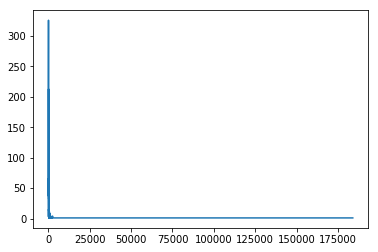

In [100]:
# Analizamos la distribución de una variable
properati['surface_total_in_m2'].value_counts().sort_index().plot.line()

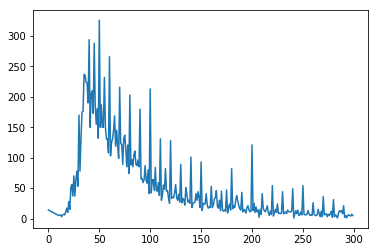

In [108]:
# Tomamos un rango más razonable
properati.query('surface_total_in_m2 < 300').surface_total_in_m2.value_counts().sort_index().plot.line()

In [117]:
# Creamos rangos para agruparlos
bins = [0, 20, 40, 60, 80, 100, 150, 200, 300, 2000]
properati['rango_surface_total_m2'] = pd.cut(properati.surface_total_in_m2, bins)

In [118]:
# vemos que valores toma
properati[['surface_total_in_m2', 'rango_surface_total_m2']].head()

,surface_total_in_m2,rango_surface_total_m2
0,312.0,"(300, 2000]"
1,121.0,"(100, 150]"
2,122.0,"(100, 150]"
3,24.0,"(20, 40]"
4,24.0,"(20, 40]"


# Creamos Variables Dummies

In [120]:
# Vemos los valores que toma la variable
properati.property_type.unique()

array(['house', 'store', 'apartment', 'PH'], dtype=object)

In [127]:
# Creamos variables Dummies
property_type_dummies = pd.get_dummies(properati.property_type)
property_type_dummies.head()

,PH,apartment,house,store
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [130]:
# Lo agregamos a nuestro DF
properati_dummies = pd.concat([properati, property_type_dummies], axis=1)
properati_dummies.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,rooms,expenses,properati_url,barrio,comuna,rango_surface_total_m2,PH,apartment,house,store
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,...,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0,"(300, 2000]",0,0,1,0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,...,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0,"(100, 150]",0,0,0,1
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,...,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0,"(100, 150]",0,0,0,1
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,...,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0,"(20, 40]",0,0,0,1
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,...,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0,"(20, 40]",0,0,0,1


In [131]:
# vemos que valores toman esas columnas
properati_dummies[['property_type','PH', 'apartment', 'house', 'store']].head()

,property_type,PH,apartment,house,store
0,house,0,0,1,0
1,store,0,0,0,1
2,store,0,0,0,1
3,store,0,0,0,1
4,store,0,0,0,1
